##I - IMPORTATION DES DONNES ET DES PACKAGES

In [ ]:
###### Imports des packages:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
# Pour pouvoir visualiser l'ensemble des tableaux
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
###### IMPORT DES DONNEES:
file_name = 'stars_train_new.csv'
df = pd.read_csv(file_name)
n = df.shape[0]
p = df.shape[1]
print(n)
print(p)
df.head()

10814
10


,obj_ID,alpha,delta,u,g,r,i,z,redshift,label
0,0,232.502422,45.121027,25.65923,22.36003,21.22009,20.18024,19.43329,0.547620,0.0
1,1,129.290210,48.672374,20.28340,20.09267,19.96514,19.58195,19.42377,1.673636,2.0
2,2,256.078422,35.629789,22.09653,22.06431,21.81846,21.55368,20.71617,1.141341,2.0
3,3,15.237270,11.871627,22.53424,21.76865,21.77098,21.59392,22.15125,0.000447,1.0
4,4,128.023708,25.454899,22.99427,21.43313,19.53053,18.75837,18.35530,0.453795,0.0


In [ ]:
features_floats = df[[o for o in df.columns if (o != 'obj_ID' and o != 'label')]].columns.tolist()

In [ ]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift',
       'label'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52295 entries, 0 to 52294
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   obj_ID    52295 non-null  int64  
 1   alpha     52295 non-null  float64
 2   delta     52295 non-null  float64
 3   u         52295 non-null  float64
 4   g         52295 non-null  float64
 5   r         52295 non-null  float64
 6   i         52295 non-null  float64
 7   z         52295 non-null  float64
 8   redshift  52295 non-null  float64
 9   label     52295 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 4.0 MB


In [ ]:
df.dtypes.value_counts()

float64    8
int64      2
dtype: int64

##II - ANALYSE DES DONNEES MANQUANTES ET DES DOUBLONS

In [ ]:
df = df.drop('obj_ID', axis = 1)
df.head()

,alpha,delta,u,g,r,i,z,redshift,label
0,232.502422,45.121027,25.65923,22.36003,21.22009,20.18024,19.43329,0.547620,0
1,129.290210,48.672374,20.28340,20.09267,19.96514,19.58195,19.42377,1.673636,2
2,256.078422,35.629789,22.09653,22.06431,21.81846,21.55368,20.71617,1.141341,2
3,15.237270,11.871627,22.53424,21.76865,21.77098,21.59392,22.15125,0.000447,1
4,128.023708,25.454899,22.99427,21.43313,19.53053,18.75837,18.35530,0.453795,0


In [ ]:
###### DETECTION/DÉCOMPTE DES VALEURS MANQUANTES
df.isna().sum().sum()
#Notre jeu de données ne cntient pas de valeurs manquantes

3

In [ ]:
# Analyse des lignes dupliquées
df.duplicated().sum()
#aucune ligne dupliquée

0

##III - ANALYSE UNIVARIÉE DES VARIABLES ET DE LA CIBLE

In [ ]:
###### DISTRIBUTIONS DE NOS VARIABLES
# Distrubution du label (numérique)
df.label.describe()

count    52295.00000
mean         0.56929
std          0.77704
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          2.00000
Name: label, dtype: float64

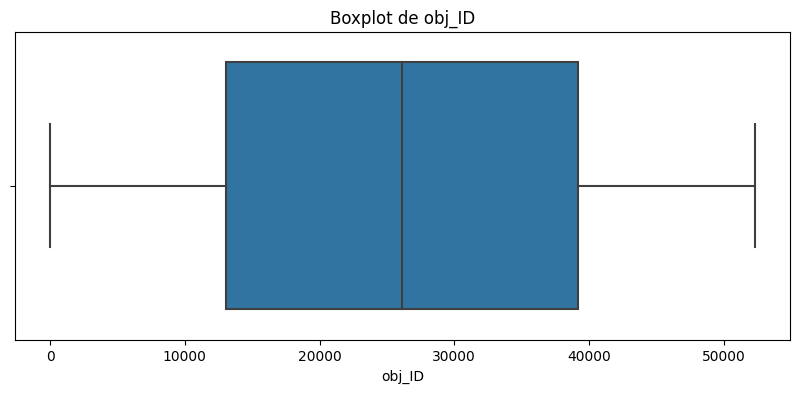

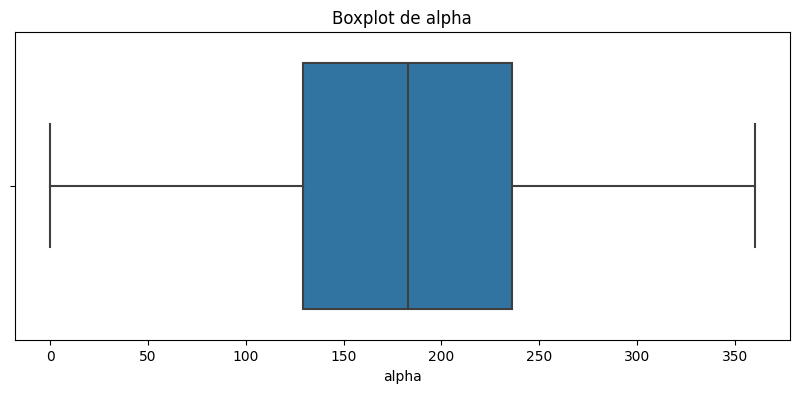

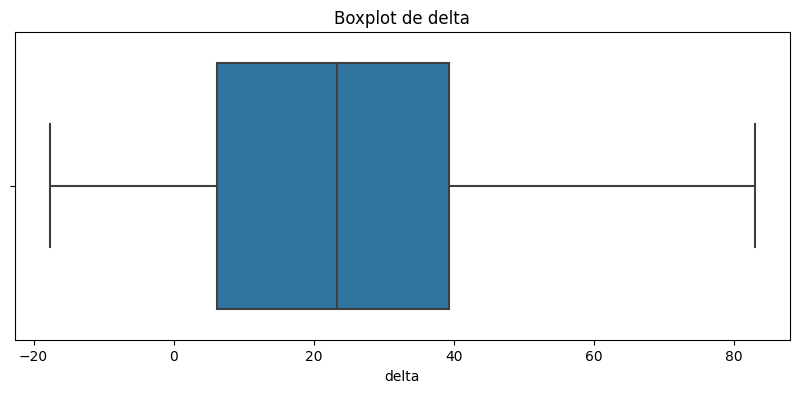

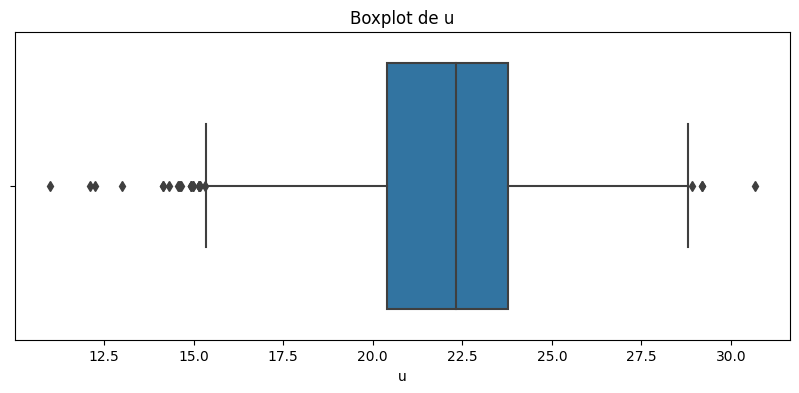

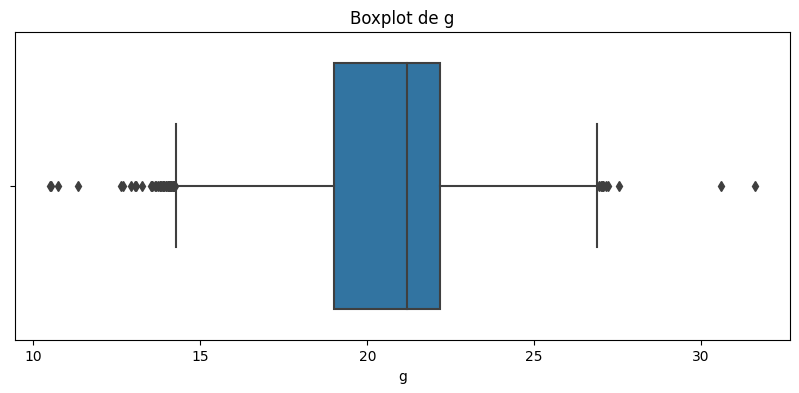

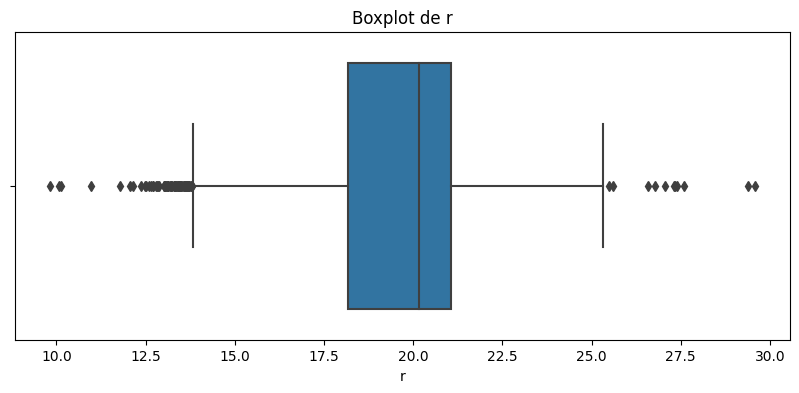

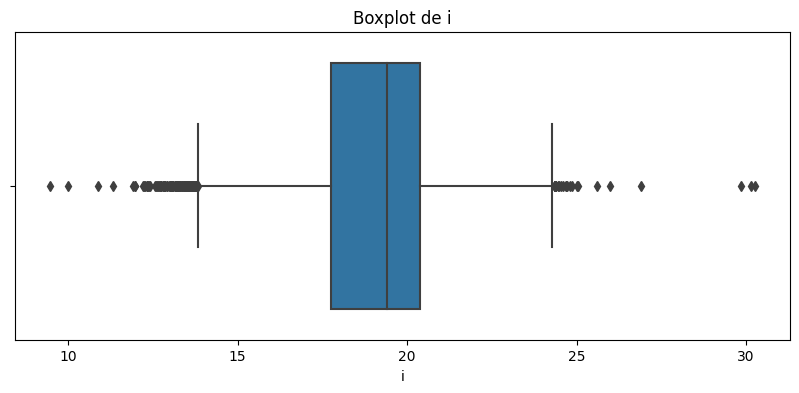

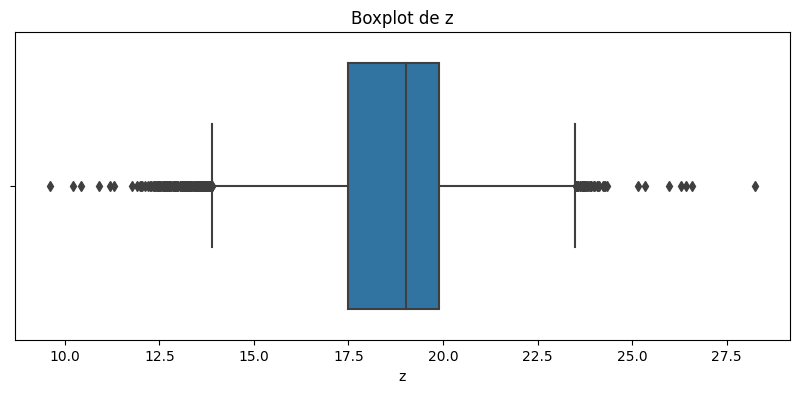

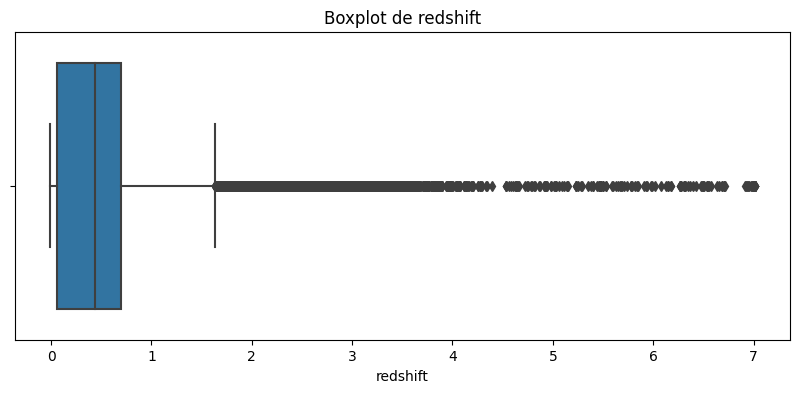

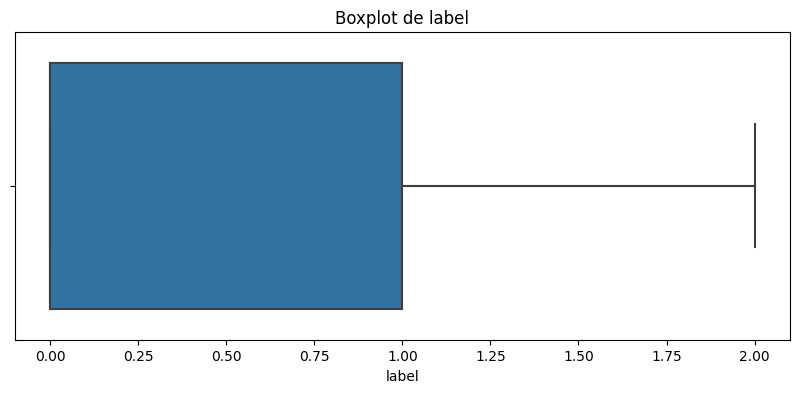

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Créer un boxplot pour chaque variable
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()


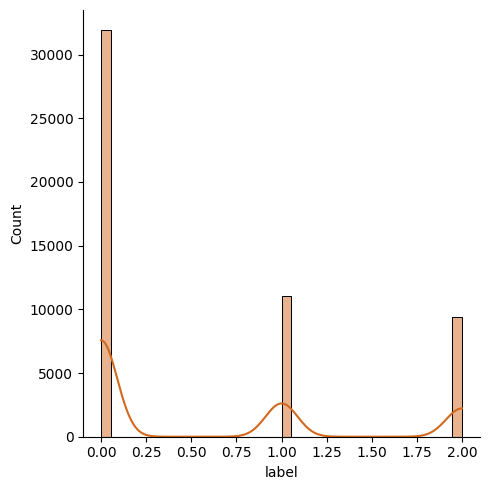

In [ ]:
sn.displot(df.label, kde = True, color = 'chocolate')

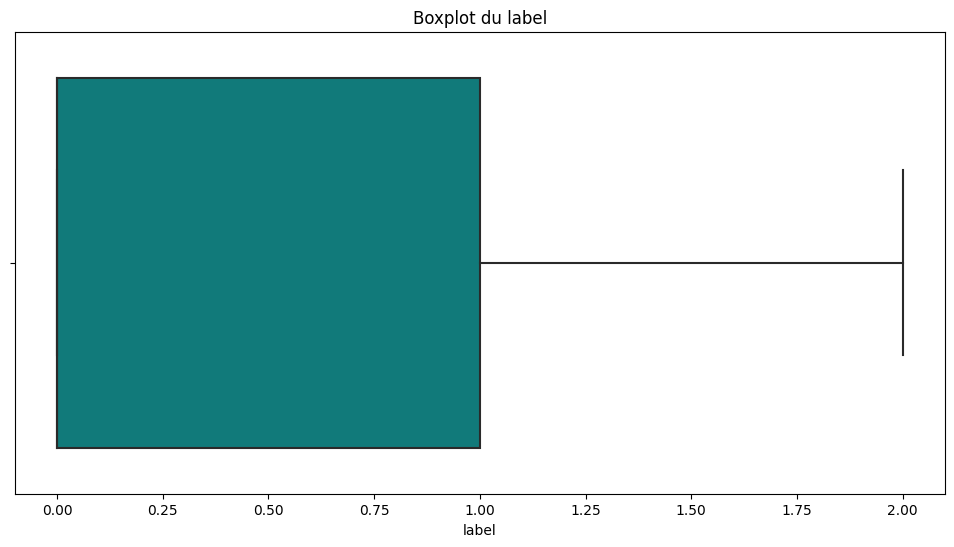

In [ ]:
plt.figure(figsize=(12, 6))
sn.boxplot(data=df, x='label', color = 'Darkcyan')
plt.xlabel('label')
plt.title("Boxplot du label")
plt.show()

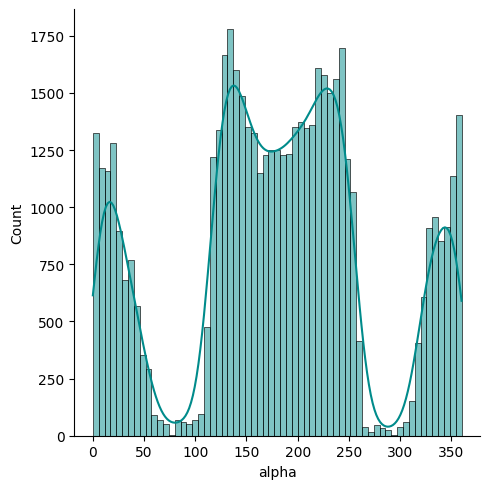

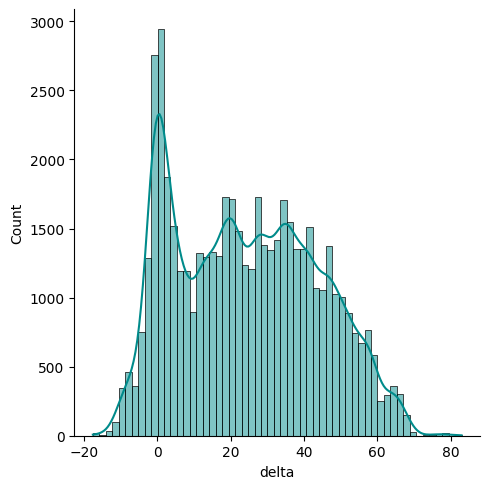

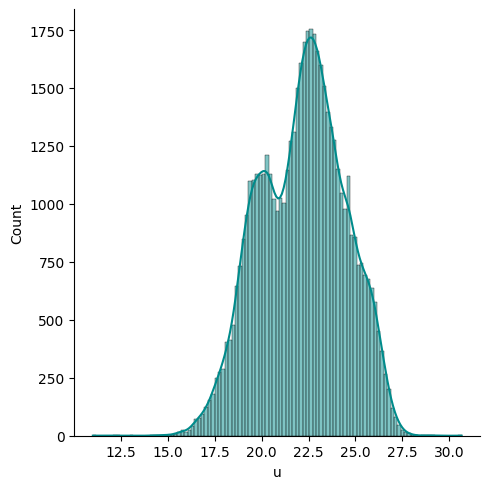

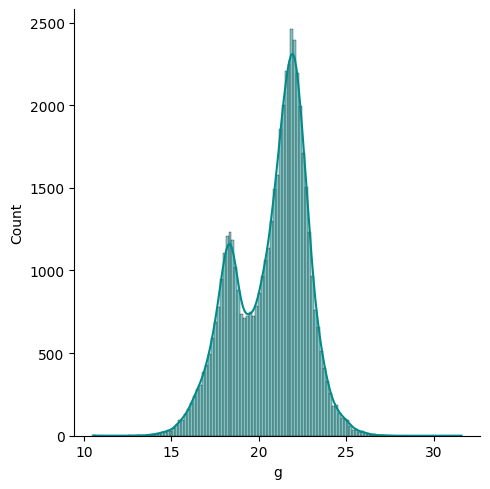

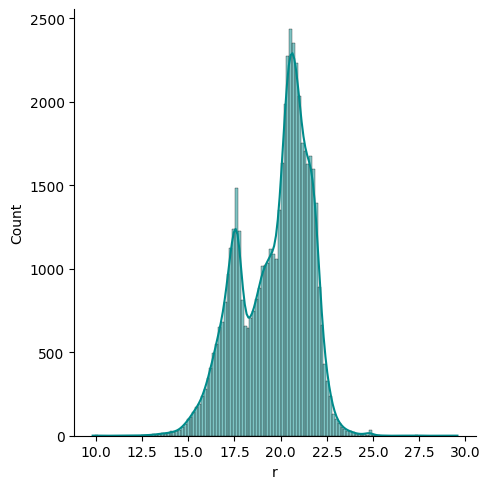

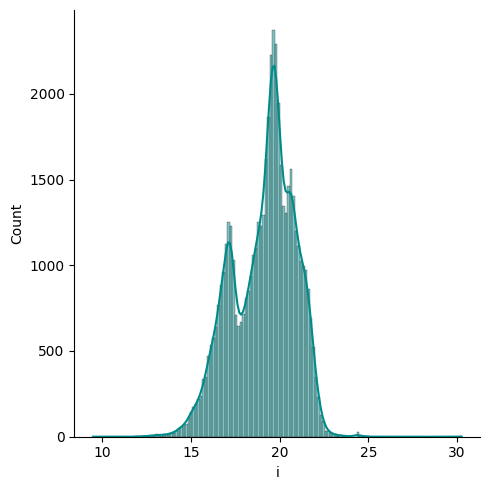

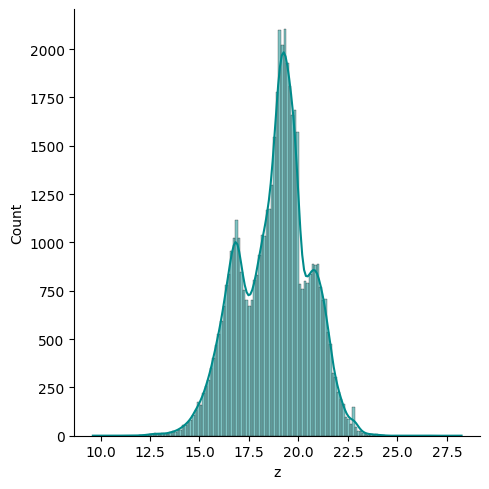

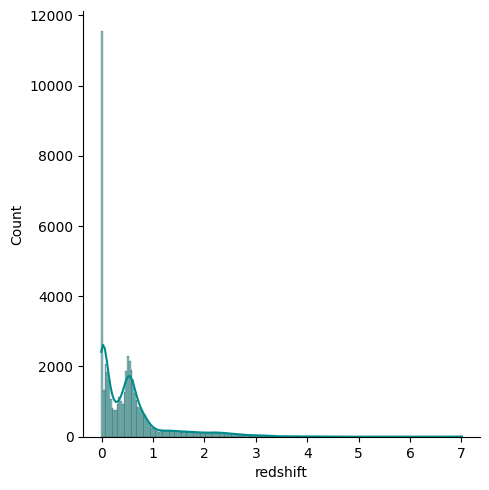

In [ ]:
# Distribution des covariables numériques
for col in features_floats:
  sn.displot(df[col], kde = True, color = 'Darkcyan')
  plt.show()

## IV - L'ANALYSE MULLTIVARIÉE POUR SAISIR LES COVARIABLES ENTRE LES CARACTÉRISTIQUES ET LA CIBLE


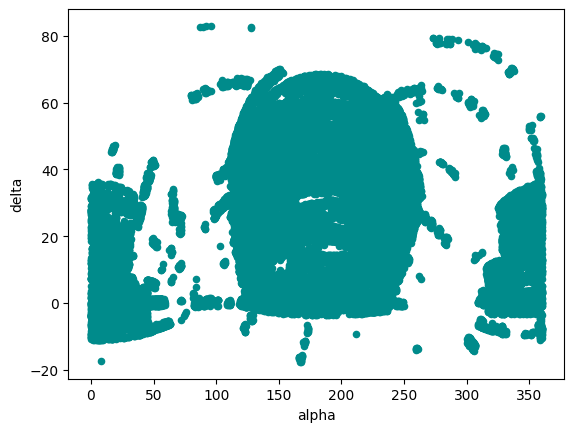

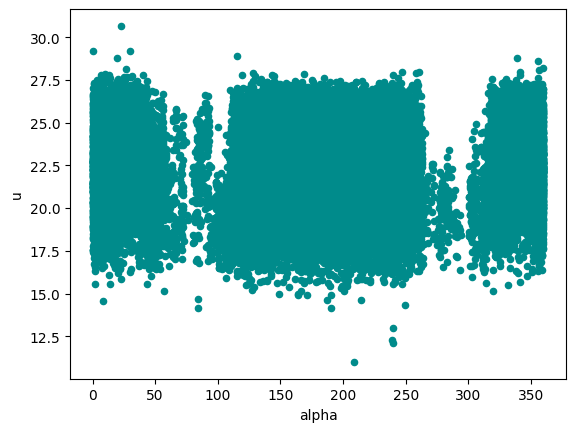

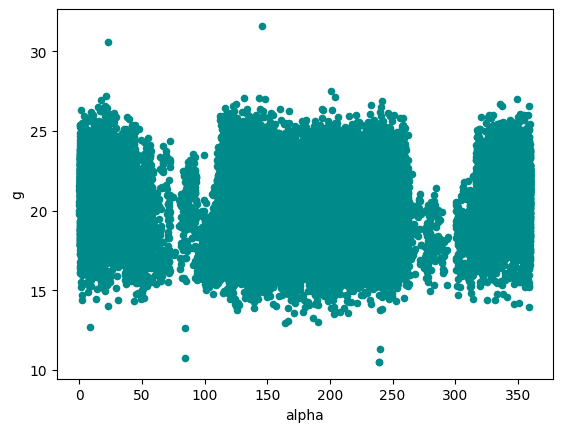

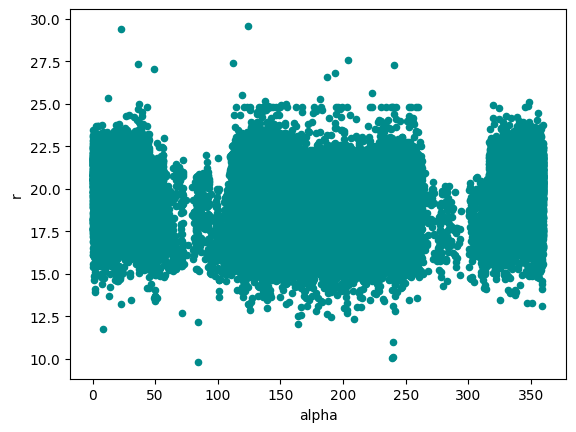

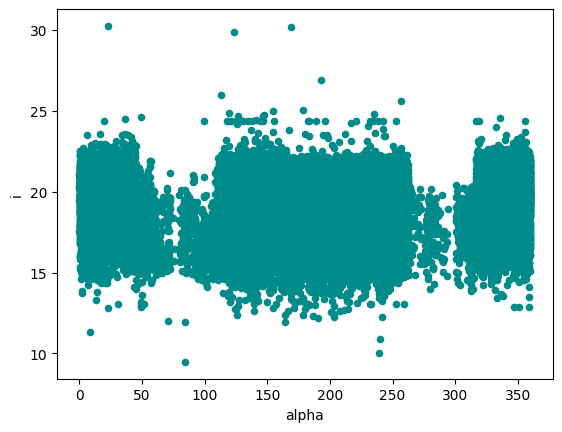

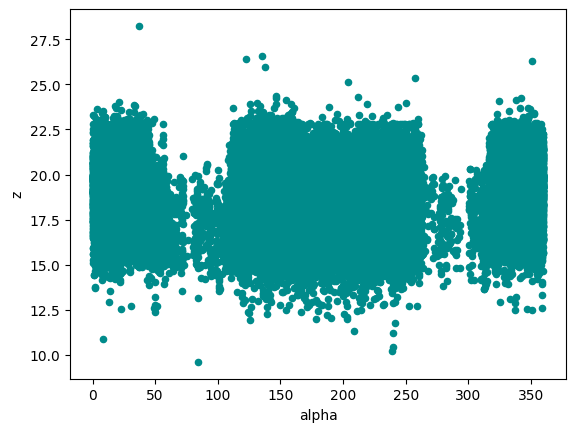

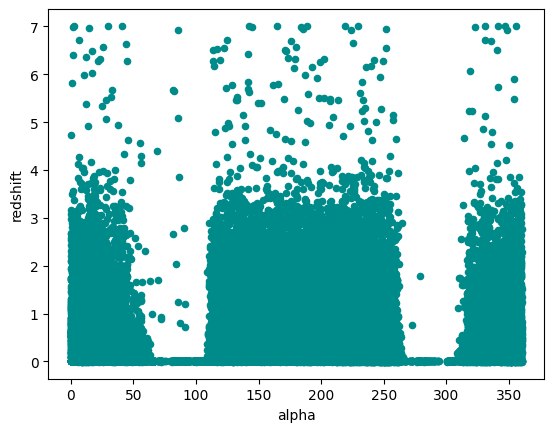

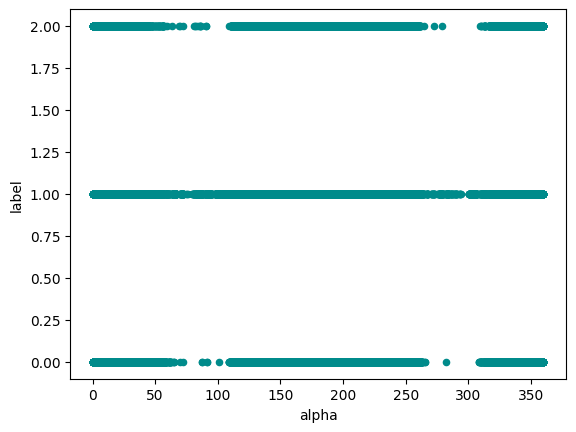

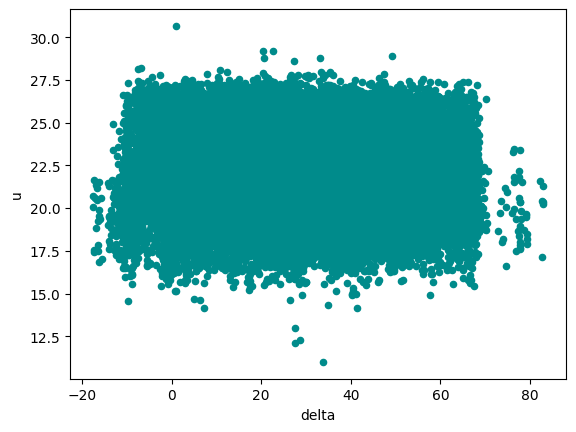

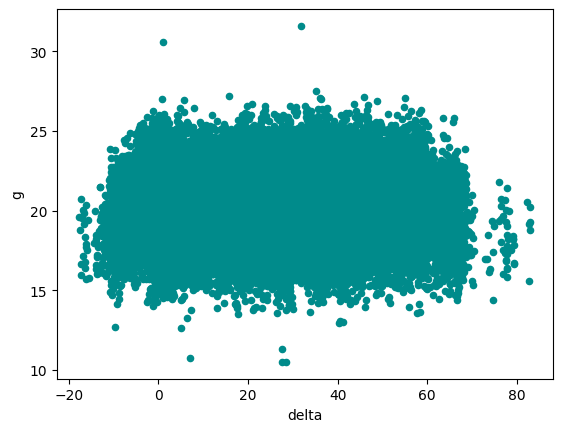

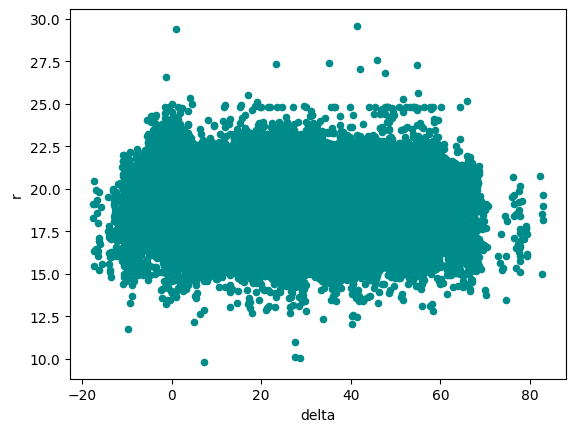

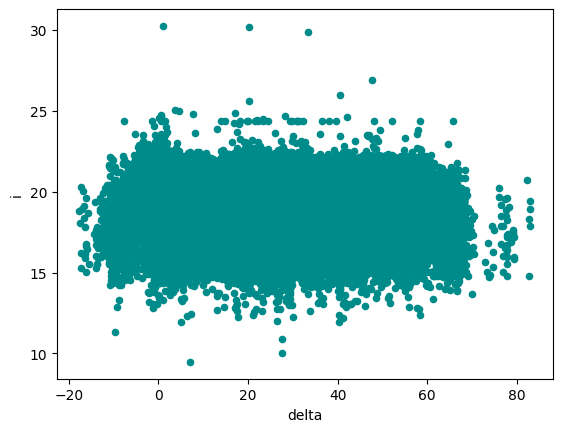

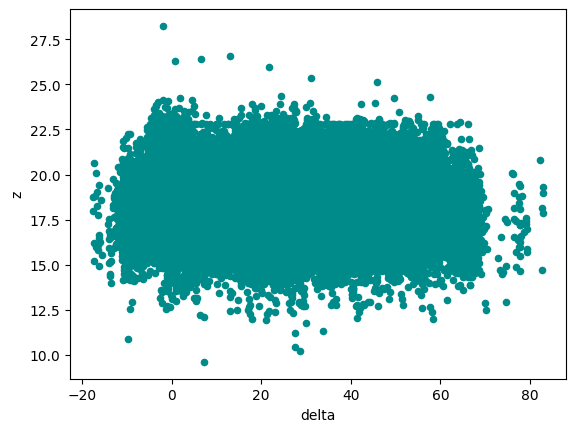

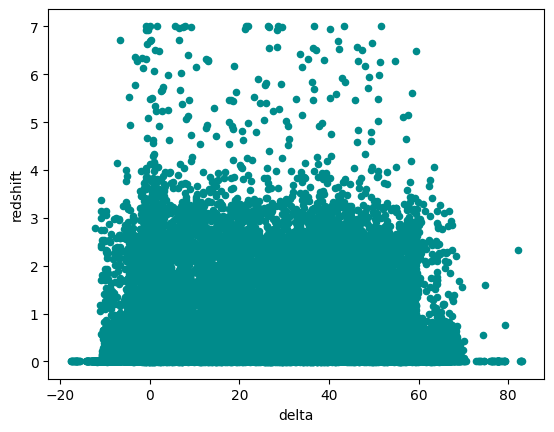

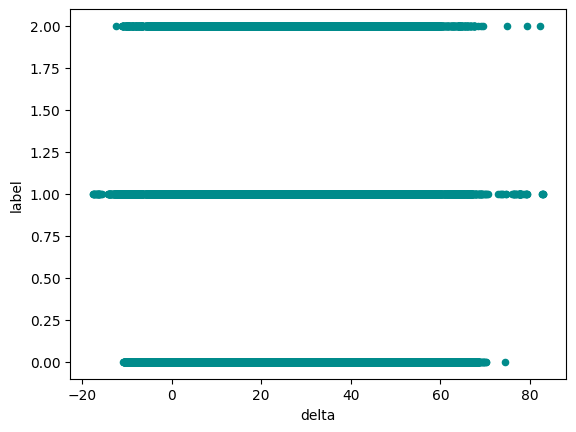

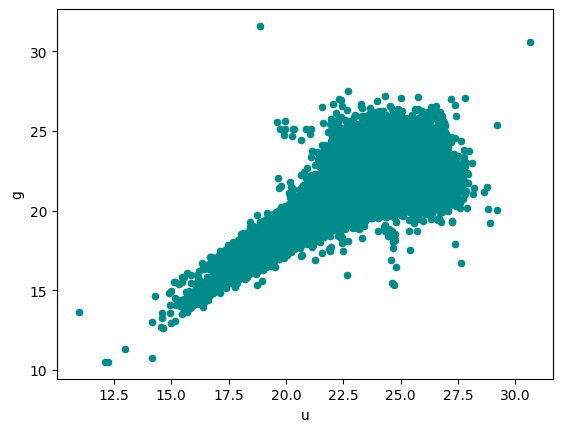

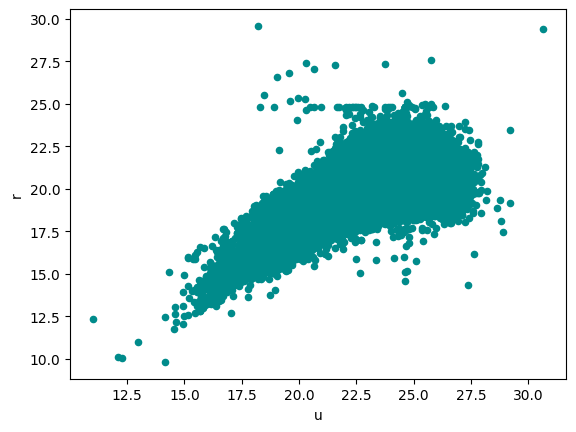

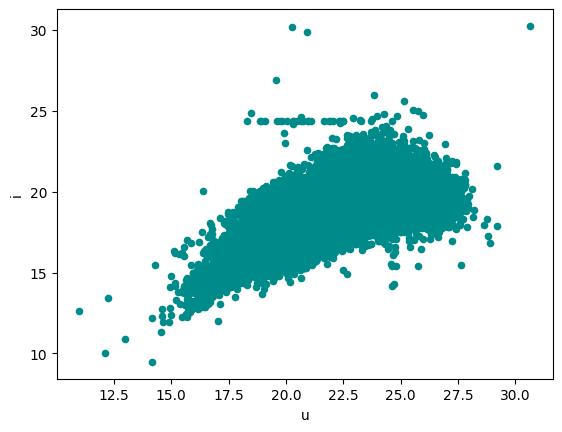

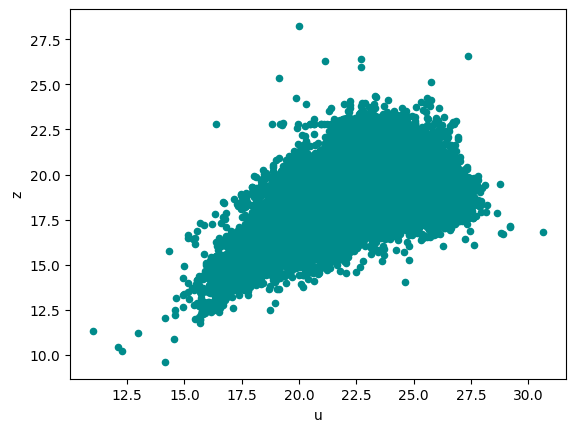

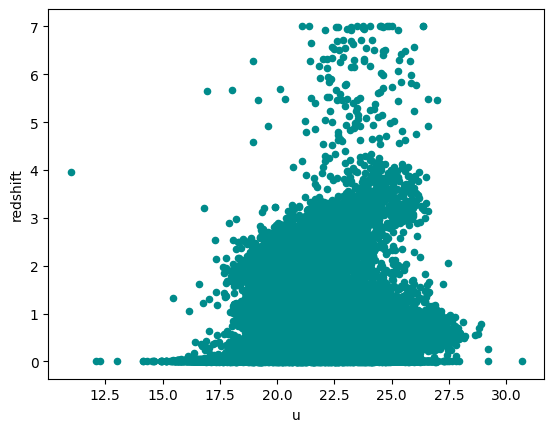

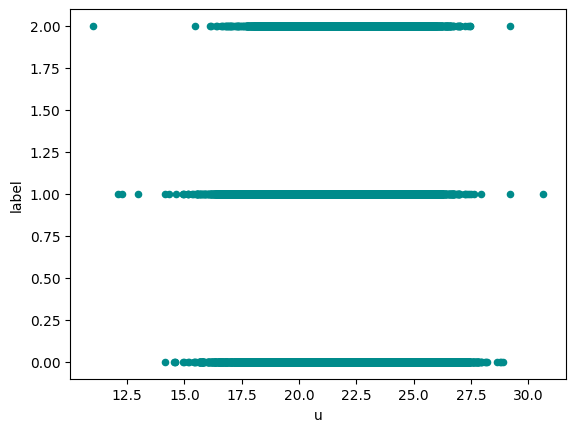

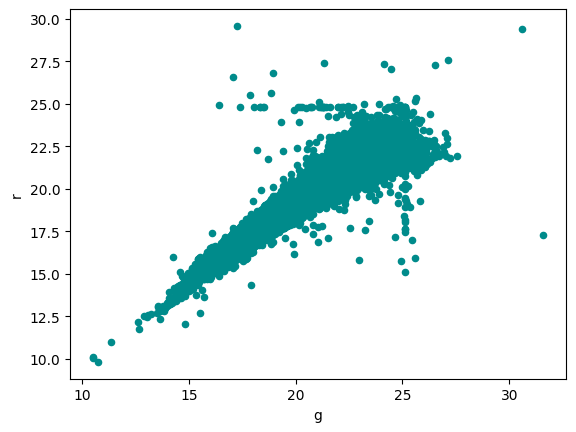

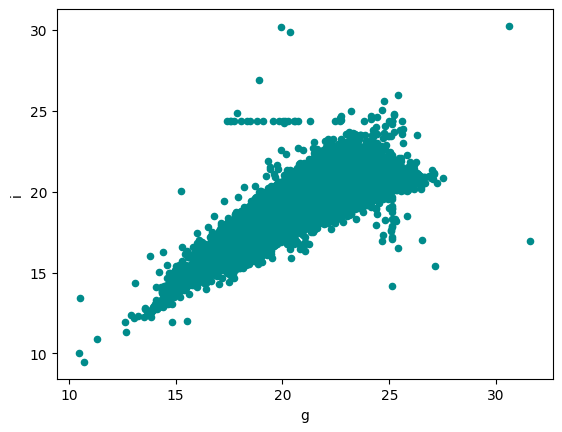

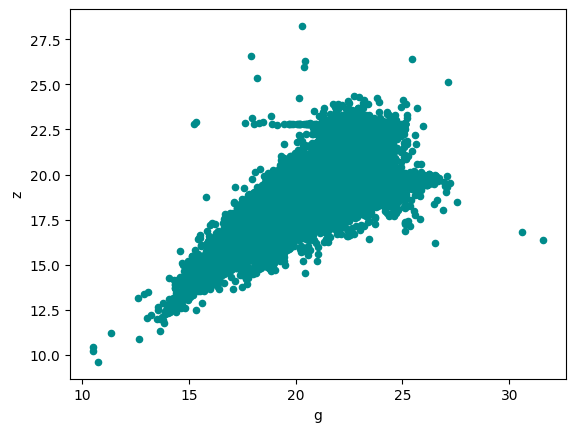

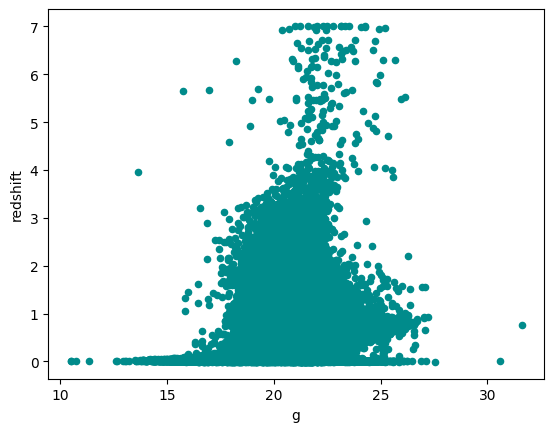

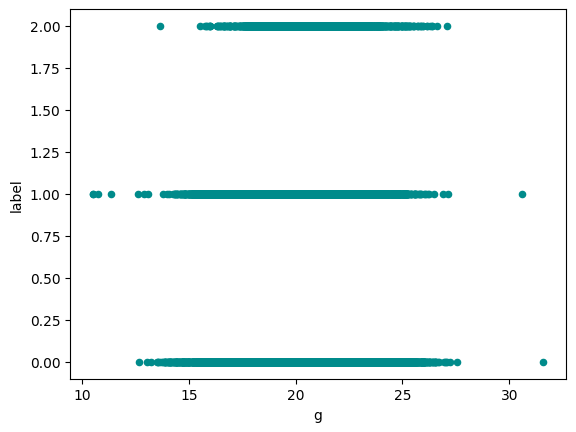

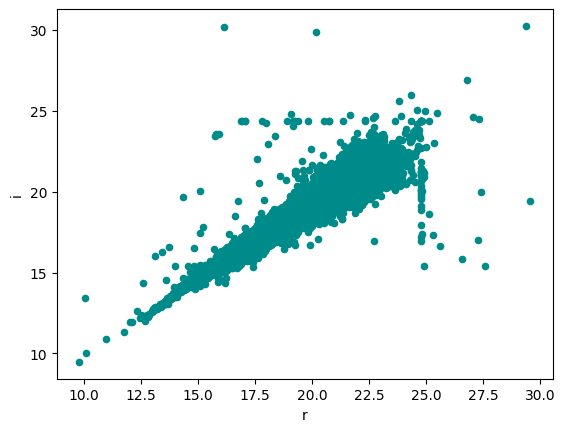

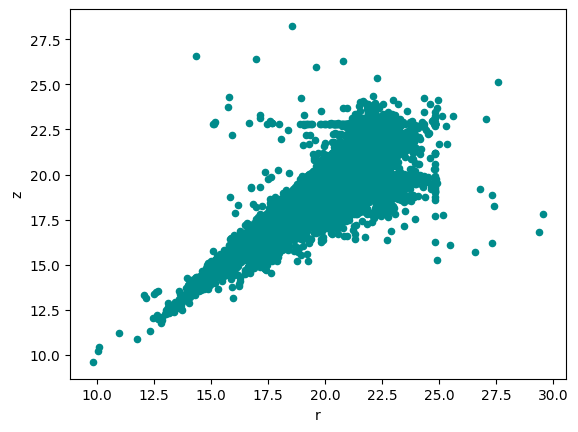

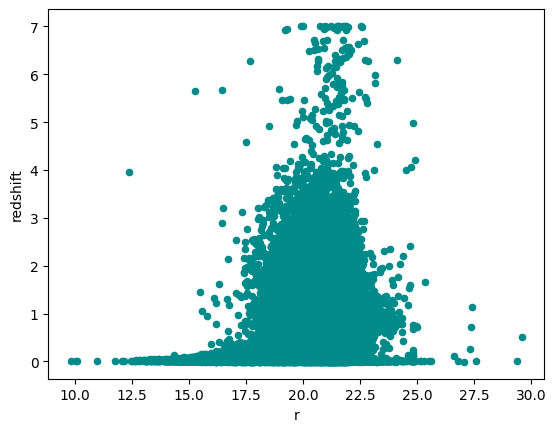

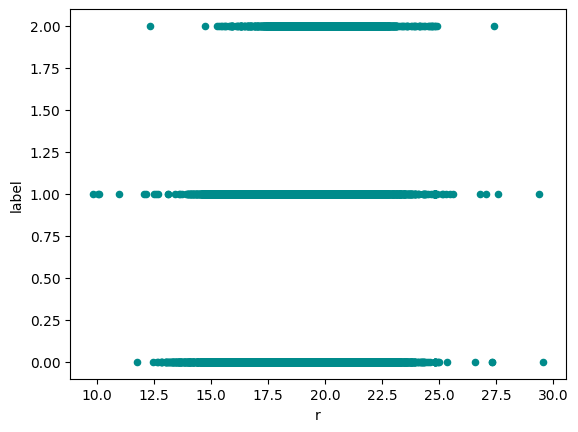

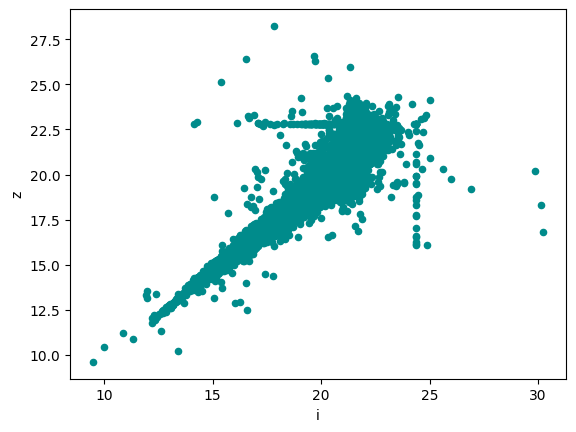

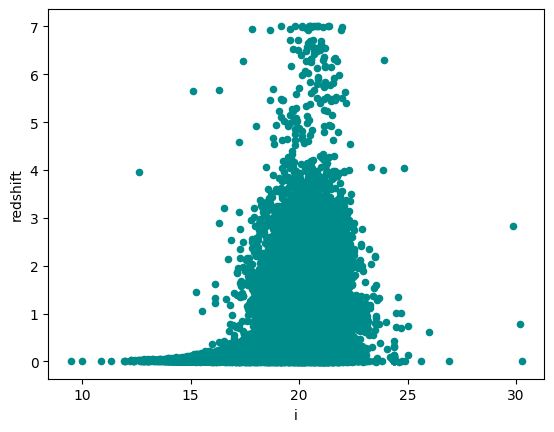

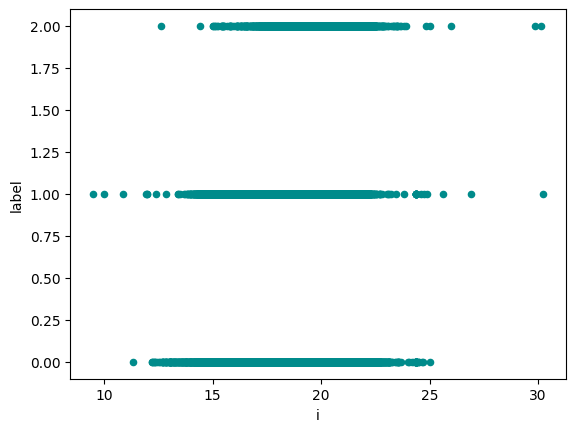

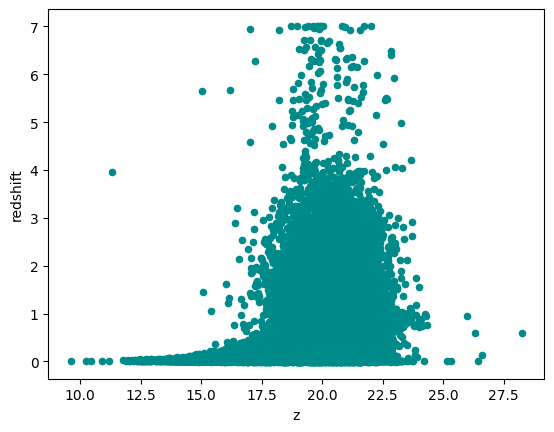

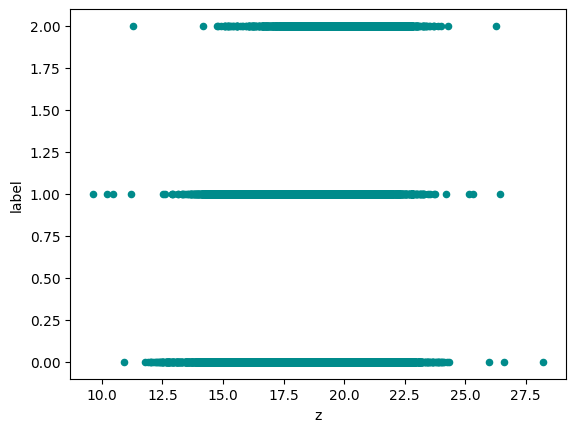

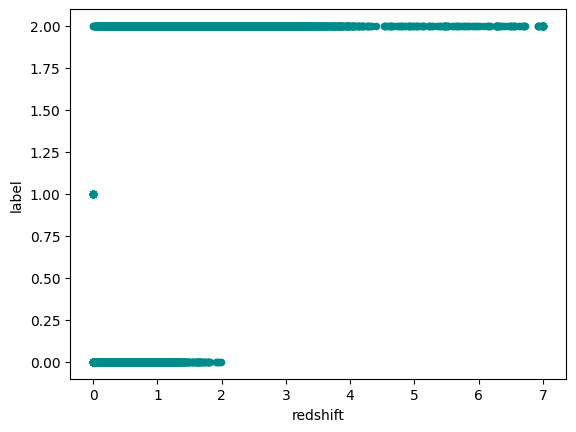

In [ ]:
# Visualisation des correlations:
for idx, i in enumerate(df.columns):
    for j in df.columns[idx+1:]:
        df.plot(kind='scatter', x=i, y=j, color='Darkcyan')
        plt.show()

In [ ]:
from seaborn import swarmplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 73.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 91.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 98.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 99.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='features', ylabel='value'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 92.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 98.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


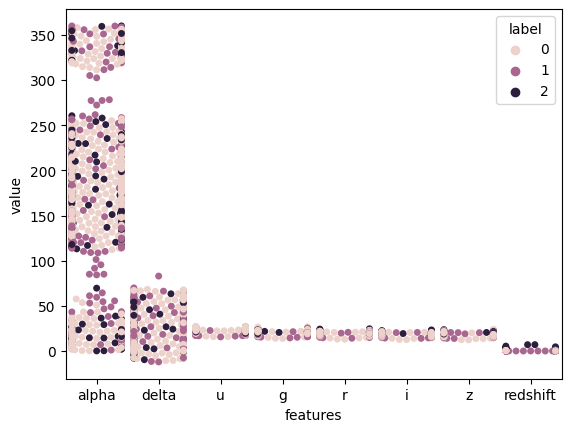

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

# Supposons que df est votre DataFrame original
# Prendre un échantillon aléatoire de 1000 observations (ou toute autre taille gérable)
sampled_df = df.sample(n=1000, random_state=1) # Vous pouvez changer n=1000 selon vos besoins

# Appliquer la transformation melt sur le sous-ensemble
data_to_plot = pd.melt(sampled_df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'label']],
                       id_vars='label',
                       var_name='features',
                       value_name='value')

# Créer le swarmplot avec le sous-ensemble
sns.swarmplot(data=data_to_plot, x='features', y='value', hue='label')


In [ ]:
# Variables numériques (target numérique)
corr_un = df.corr(method = 'pearson')
corr_un_values = abs(corr_un['label']).sort_values(ascending = False).reset_index()
corr_un_values.columns = ['Variables','Correlation_Coefficient']
corr_un_values.head(30)
# Affiche les corrélations avec les variables de type float

,Variables,Correlation_Coefficient
0,label,1.000000
1,redshift,0.526514
2,z,0.326164
3,i,0.269308
4,u,0.227261
5,r,0.135033
6,g,0.077366
7,delta,0.038563
8,alpha,0.000512


### COVARIABLES/COVARIABLES

<Axes: >

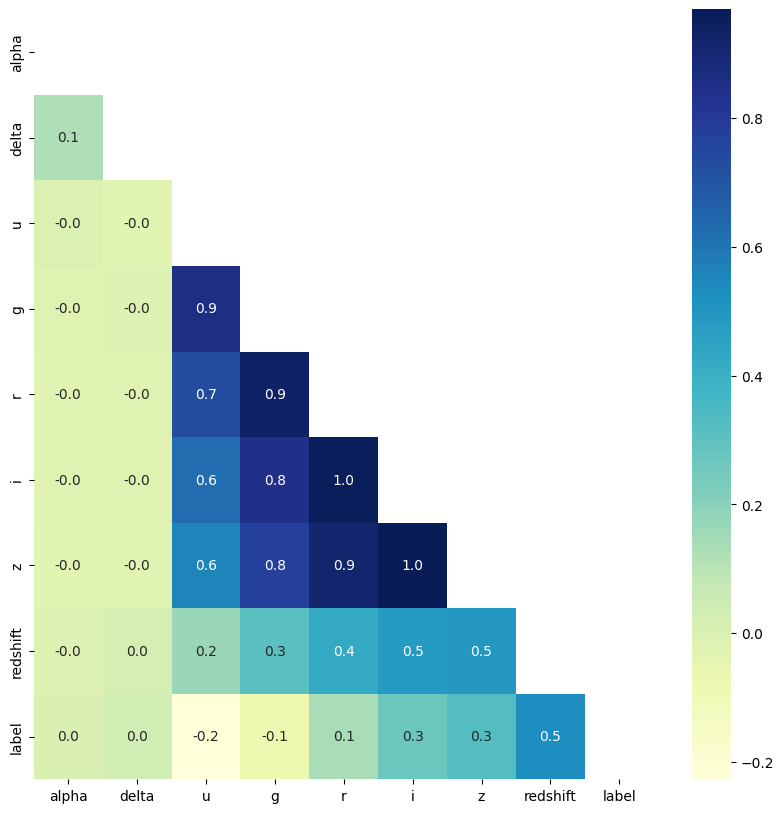

In [ ]:
###### RELATION VARIABLE/VARIABLE:
# Variables numériques
f = plt.subplots(figsize = (10, 10))
corr = df.corr(method = 'pearson')
mask = np.triu(np.ones_like(corr, dtype=bool)) #mask upper triangle
sn.heatmap(corr, mask = mask,  annot = True, fmt ='.1f',cmap = "YlGnBu",annot_kws = {"size":10})

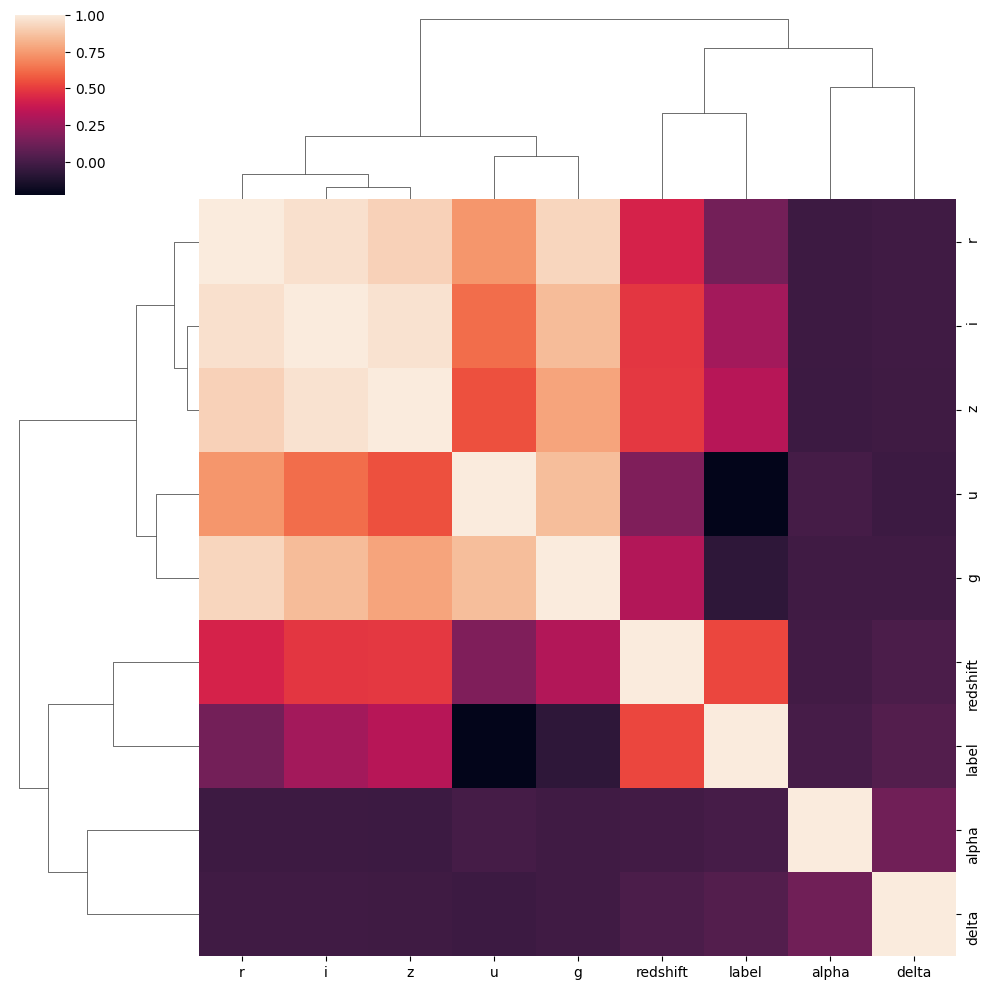

In [ ]:
sn.clustermap(corr)

In [ ]:
# On regarde les variables avec la plus forte corrélation entre - elles (corrélation linéaire )
def extract_corr_values(correlation_matrix):

    # Extraction des couples de variables et des corrélations
    corr_values = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().reset_index()
    corr_values.columns = ['Variable_1', 'Variable_2', 'Correlation_Coefficient']

    # Filtrage et tri du DataFrame
    corr_values = corr_values.sort_values(by='Correlation_Coefficient', ascending=False)

    return corr_values

In [ ]:
corr_values = extract_corr_values(corr)
corr_values.head(30)

,Variable_1,Variable_2,Correlation_Coefficient
30,i,z,0.969091
26,r,i,0.962472
21,g,r,0.932854
27,r,z,0.916648
15,u,g,0.852342
22,g,i,0.847217
23,g,z,0.775520
16,u,r,0.732588
17,u,i,0.624321
18,u,z,0.553904


## V - PRE-PROCESSING

In [ ]:

from sklearn.preprocessing import StandardScaler
# Scaler les variables
def scale (df, label_column):
    X = df.drop(columns=[label_column])
    y = df[label_column]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=df.index)
    scaled_df[label_column] = y
    return scaled_df

df=scale(df,'label')



## VI - MODELISATION ET EVALUATION

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve

In [ ]:
features = [o for o in df.columns if (o!='label')]
X = df[features]
y = df['label']

In [ ]:


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def eval(Y_train, Y_test, Y_pred, Y_pred_train):
    score = pd.DataFrame({
        'F1 Score': [f1_score(Y_test, Y_pred, average='weighted'),
                    f1_score(Y_train, Y_pred_train, average='weighted')]
    }, index=['Test', 'Train'])
    print(score)

def plot_pred(Y_test, Y_pred):
    plt.rcParams['figure.figsize'] = (15,10)
    x_ax = range(len(Y_test))
    plt.scatter(x_ax, Y_test, label='Observed', color='k', marker='o')
    plt.scatter(x_ax, Y_pred, label='Predicted', color='Darkcyan', marker='x')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
    plt.show()

def plot_fitting(model, X_train, X_test, Y_train, Y_test):
    N, train_score, val_score = learning_curve(model, X_train, Y_train, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train_score (accuracy)', color='Darkcyan')
    plt.plot(N, val_score.mean(axis=1), label='val_score (accuracy)', color='chocolate')
    plt.xlabel('train_size')
    plt.legend()

len(Y_train)


41836

### MODÈLES BASIQUES

In [ ]:
# Définition des modèles
knn = KNeighborsClassifier()
log_reg = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()

models = {'KNN': knn, 'Logistic Regression': log_reg, 'SVM': svm}




# Entraînement et évaluation des modèles
for name, model in models.items():
    print(name)
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred = model.predict(X_test)
    eval(Y_train, Y_test, Y_pred, Y_pred_train)


KNN
       F1 Score
Test   0.908376
Train  0.933537
Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


       F1 Score
Test   0.955472
Train  0.954033
SVM
       F1 Score
Test   0.959355
Train  0.959291


On remarque que le problème de surapprentissage semble diminuer quand la taille du des données d'entrainement augmente.

### FORET ALEATOIRE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=5)

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [ 200],  # Nombre d'arbres
    'max_features': ['auto', 'sqrt'], # Nombre max de caractéristiques considérées pour diviser un noeud
    'max_depth' : [ 8,9,10],          # Profondeur maximale de l'arbre
    'criterion' :[ 'entropy']
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustement du modèle avec la recherche par grille
grid_search.fit(X_train, Y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres: ", grid_search.best_params_)

# Utilisation du meilleur modèle trouvé
best_rf = grid_search.best_estimator_

# Prédiction sur l'ensemble de test
Y_pred = best_rf.predict(X_test)

# Calcul et affichage de la précision
accuracy = accuracy_score(Y_test, Y_pred)
print("Précision du modèle sur l'ensemble de test: {:.2f}%".format(accuracy * 100))


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Meilleurs paramètres:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
Précision du modèle sur l'ensemble de test: 97.47%


### XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

best_param ={'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 300}

# Création du modèle XGBoost
xgb = XGBClassifier(random_state=5)

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [ 300], # Nombre d'arbres
    'learning_rate': [ 0.1], # Taux d'apprentissage
    'max_depth': [15], # Profondeur maximale de l'arbre
    'colsample_bytree': [ 0.8] # Fraction de colonnes à prendre pour chaque arbre
}

# Configuration de GridSearchCV  #Environ 30 min de calcul
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustement du modèle avec la recherche par grille
grid_search.fit(X_train, Y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres: ", grid_search.best_params_)
#{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 300}



# Utilisation du meilleur modèle trouvé
best_xgb = grid_search.best_estimator_

# Prédiction sur l'ensemble de test
Y_pred = best_xgb.predict(X_test)

# Calcul et affichage de la précision
accuracy = accuracy_score(Y_test, Y_pred)
print("Précision du modèle sur l'ensemble de test: {:.2f}%".format(accuracy * 100))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Meilleurs paramètres:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 300}
Précision du modèle sur l'ensemble de test: 97.36%


### ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Création du modèle AdaBoost avec un arbre de décision comme estimateur de base
base_estimator = DecisionTreeClassifier(random_state=5)
ada = AdaBoostClassifier(base_estimator=base_estimator, random_state=5)

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100,110 ],  # Nombre d'estimateurs
    'learning_rate': [0.01],  # Taux d'apprentissage
    'base_estimator__max_depth': [8]  # Profondeur maximale pour l'estimateur de base (arbre de décision)
}
#30 minutes de calcul poour trouver le meilleur hyperparamètre de cette grille

# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustement du modèle avec la recherche par grille
grid_search.fit(X_train, Y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres: ", grid_search.best_params_)

# Utilisation du meilleur modèle trouvé
best_ada = grid_search.best_estimator_

# Prédiction sur l'ensemble de test
Y_pred = best_ada.predict(X_test)

# Calcul et affichage de la précision
accuracy = accuracy_score(Y_test, Y_pred)
print("Précision du modèle sur l'ensemble de test: {:.2f}%".format(accuracy * 100))


Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Meilleurs paramètres:  {'base_estimator__max_depth': 8, 'learning_rate': 0.01, 'n_estimators': 110}
Précision du modèle sur l'ensemble de test: 97.47%


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Création de l'instance SVC (Support Vector Classifier)
svm = SVC(random_state=5)

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10],  # Paramètre de régularisation
    'gamma': ['auto', 0.1, 1, 10],  # Coefficient du noyau pour 'rbf', 'poly' et 'sigmoid'
    'kernel': ['rbf', 'poly', 'sigmoid']  # Type de noyau utilisé dans l'algorithme
}
#Avec cette grile, on a environ 40 minutes de calcul

# Configuration de GridSearchCV

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustement du modèle avec la recherche par grille
grid_search.fit(X_train, Y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres: ", grid_search.best_params_)

# Utilisation du meilleur modèle trouvé
best_svm = grid_search.best_estimator_

# Prédiction sur l'ensemble de test
Y_pred = best_svm.predict(X_test)

# Calcul et affichage de la précision
accuracy = accuracy_score(Y_test, Y_pred)
print("Précision du modèle sur l'ensemble de test: {:.2f}%".format(accuracy * 100))


Fitting 3 folds for each of 36 candidates, totalling 108 fits


### AGREGAT D'EXPERTS

Notre but ici c'est de créer un nouveau model de prédiction qui combine les précédents models. L'idée est pour chaque observation, on choisit la classe qui a le vote majoritaire parmis les models précédents.

In [ ]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

def agregation_experts(models, X_test, Y_test):
    # Prédire avec chaque modèle
    predictions = [model.predict(X_test) for model in models.values()]

    # Vote majoritaire
    predictions = np.array(predictions)
    predictions_majority, _ = mode(predictions, axis=0)

    # Convertir les prédictions en un format utilisable
    predictions_majority = predictions_majority.reshape(-1)

    # Calculer le score
    score = accuracy_score(Y_test, predictions_majority)

    return predictions_majority, score

# Utilisation
models = { 'XGboost' : xgb, 'Random forest' : best_rf, 'Adaboost' : best_ada,  'svm' : svm , "KNN" : knn, "Regression logistique" : log_reg}
predicted_labels, score = agregation_experts(models, X_test, Y_test)

print("Précision de l'agrégation d'experts: {:.2f}%".format(score * 100))


NameError: ignored